# Project 1: clustering and analysis of the TCGA transcriptomic dataset

## Motivation

The motivation for this project comes from my curiosity about how modern dimensionality-reduction and clustering algorithms are used in biological data analysis, especially in multi-omics and transcriptomics research.  

I wanted to use this assignment as an opportunity to explore a dataset from The Cancer Genome Atlas (TCGA) and to get some hands-on experience with the kinds of workflows that are common in this area.  
 
More specifically, my goal is to compare the performance and interpretability of two popular algorithms: t-SNE and UMAP, for visualizing high-dimensional RNA-seq gene expression data.  

I often come across figures like this one in biology papers and presentations:  
<img src="https://kagi.com/proxy/blog%20Visualizing%20Single-Cell%20RNA-Seq%20Data%20with%20t-SNE-%20Researcher%20Interview%20with%20Dmitry%20Kobak%20and%20Philipp%20Berens.png?c=7wFdHnjdYvjJyaubyYjYK_5knm5a2JLsjaQR61UGXexz8F2uYT094Juv1WUp_PzMmwnpKN5ZFReaild0gjJO-qYdkmh70tqYpbby4dCKNm0OZyBuV34Ol2NhNvchg78pimjQd1EIdaze5CB-TyT4e00TG7I-LwM2QqZPzk_7MlcE35_PlqGs7iocy1jZQfQbxGve0shx9I0WvR2S9Rbf--JtjdMmS4Q-ilJiO-lHIT0drIZI87ocPjXL00i_cmmvHcP93vir7v6ty5IbecFFSdhF7KHW6Lv2EKhtgqJpl3lWWmSnCtP8LMMEsfyZNtL3W5SEPRNpczY0nGKm3vPl2OxYTOyYfc-m3J6mgnzHUpojAIVzxVJWs8E-36cUH2Lc" width="50%"/>  

For a long time, I’ve wondered what these images actually represent and how they’re created. So I want to try to reproduce a similar analysis myself.


## Dataset 
### TCGA TPM Expression Summary: Processed Transcriptomic Data from 10 Cancer Types

<img src="./images/tcga_portal.png" width="70%"/>

[Data link](https://figshare.com/articles/dataset/TCGA_TPM_Expression_Summary_Processed_Transcriptomic_Data_from_10_Cancer_Types/28324271?file=52061405)

*This dataset contains TPM (Transcripts Per Million) expression values derived from The Cancer Genome Atlas (TCGA) for ten cancer types: BRCA (breast cancer), COAD (colon adenocarcinoma), DLBC (diffuse large B-cell lymphoma), KIRC (kidney renal clear cell carcinoma), KIRP (kidney renal papillary cell carcinoma), LUAD (lung adenocarcinoma), LUSC (lung squamous cell carcinoma), MESO (mesothelioma), READ (rectum adenocarcinoma), and SKCM (skin cutaneous melanoma). The data have been processed and curated for downstream bioinformatics analyses.*

Subset selected for the project - **BRCA**.

<img src="https://kagi.com/proxy/fnins-15-591122-g001.jpg?c=GtkVFZg7eGMsIIyzL1SU9bJE-A6ooUHcdFPQcq9yNBq4tVXvY7u9N8_4VJK-6RBk4nqcmmYAh6DqVjHBHn36g-ny0iyhTmSpyqzrvTvbM2JbjAd5Ma-ZKMUkaAgkXEkB-49vZm5XMME_CUCilE35o29T-u29JjrSprwBYWIsflA%3D" width="60%"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

xl = pd.ExcelFile("./TCGA_all_workbook.xlsx")
print("Available sheets:", xl.sheet_names)

df = pd.read_excel("./TCGA_all_workbook.xlsx", sheet_name="brca_tpm_summary_noMSTRG")
df.set_index('transcript', inplace=True)
df.head(5)

Available sheets: ['brca_tpm_summary_noMSTRG', 'coad_tpm_summary_noMSTRG', 'dlbc_tpm_summary_noMSTRG', 'kirc_tpm_summary_noMSTRG', 'kirp_tpm_summary_noMSTRG', 'luad_tpm_summary_noMSTRG', 'lusc_tpm_summary_noMSTRG', 'meso_tpm_summary_noMSTRG', 'read_tpm_summary_noMSTRG', 'skcm_tpm_summary_noMSTRG']


,091a54cd-e3b3-4af2-828f-a80e64504f5e,09a6358a-c852-4054-b91b-66c506e02a0f,0a3555d2-16fa-4798-851f-8217315a0b82,11c9ecd3-a1ef-482d-a644-c2d294d0f150,11d77ef2-b3f9-4af9-8490-71f9a8c599e0,16c146d7-1d5c-4561-867e-1a45e1626b30,185a2892-ff37-4c93-9d11-f2770ad584dd,186dc2a0-0c42-43f8-8d94-799eaffc110b,212fc9b9-ab21-45b5-b2df-341fe52a41aa,3b7d97d0-fb47-4d9d-b521-2bf6bc80c7a7,...,b8cf532a-ad2b-431c-bd2c-e87c163649a6,c0ee6e25-02b9-4b2f-9f23-fd61eedf9945,c1a95836-8888-4e50-956d-419c3caadc36,c27b56c7-5274-47f7-aaa5-cf1c0c0e0b78,c316238f-d565-4199-b464-fc35527b1ebe,ce3d0dc8-55f2-4554-9049-c72d05a4d7a5,d1d092f0-70a1-4ff1-8a2b-5f33a33dba81,dc3ff3a2-41a0-4613-805e-60bb9c1c6a4e,e68385d2-951b-4358-bc3c-08716dab1431,f00b1c59-864c-4bf6-8bd4-7822051d2999
transcript,,,,,,,,,,,,,,,,,,,,,
ENST00000000233.10,96.588226,182.424026,200.732666,225.563736,122.175873,101.318871,151.172867,99.286087,124.581367,88.508995,...,188.849960,115.078056,77.919930,172.210861,140.142792,166.523804,116.537567,123.060822,160.017731,195.986786
ENST00000000412.8,50.749279,75.232002,40.181633,49.209694,72.279015,83.726349,80.656120,54.719448,51.147305,81.359032,...,48.033569,40.087833,58.261406,27.534756,77.487747,61.827740,90.873352,100.258850,83.839966,29.193172
ENST00000000442.11,6.423678,12.287890,6.593730,10.920747,13.083251,1.663119,1.896499,3.654462,8.306145,3.746788,...,2.172153,2.011549,2.892610,4.720766,2.489203,12.916063,12.314359,7.219753,10.521680,5.560592
ENST00000001008.6,123.573334,313.044373,154.982452,93.763306,121.564682,280.926239,253.414612,121.853851,170.002563,178.666611,...,131.388031,97.035141,471.580627,61.449017,342.306305,59.820045,345.898376,352.693359,508.005981,98.373848
ENST00000001146.6,6.469086,0.926554,1.650253,11.765481,3.397691,2.664326,0.598352,0.939038,1.167808,0.280928,...,5.482145,0.265135,0.626820,0.558750,0.441345,4.610602,0.661892,0.258421,1.323210,1.270982


The dataset contains **RNA-seq gene expression data**, provided as a matrix of normalized **Transcripts Per Million (TPM)** values.

Each row represents a single transcript (RNA molecule) measured across samples, each column corresponds to an individual sample.  
There are 49 samples and 180260 transcripts.

### Preprocessing

1. Filter out genes that are rarely expressed by keeping only those that have non-zero expression in at least 10% of samples.
2. Log-transform the data (using log1p) to reduce the effect of extreme values and make the distribution more normal.
3. Select top 1000 most variable genes to reduce the dataset size to the most interesting transcripts
4. Standardize the data using z-score normalization (subtracting mean and dividing by standard deviation) for each gene across all samples, with any resulting NaN values set to zero.

In [2]:
# Drop genes with too many zeros (keep genes where at least 10% of samples have non-zero expression)
min_nonzero_frac = 0.1
nz_frac = (df != 0).sum(axis=1) / df.shape[1]
df = df.loc[nz_frac >= min_nonzero_frac]

# Log transform
df = np.log1p(df)

# select top 500 most variable genes
variability = df.var(axis=1) 
top_n_genes = 1000
top_genes = variability.sort_values(ascending=False).head(top_n_genes).index.tolist()

df_top_genes = df.loc[top_genes]
print("Selected genes:", df_top_genes.shape[0])

# Z-score normalized data across samples
df_top_genes = df_top_genes.sub(df_top_genes.mean(axis=1), axis=0).div(df_top_genes.std(axis=1).replace(0, np.nan), axis=0)
df_top_genes = df_top_genes.fillna(0.0)

df_top_genes.head()

Selected genes: 1000


,091a54cd-e3b3-4af2-828f-a80e64504f5e,09a6358a-c852-4054-b91b-66c506e02a0f,0a3555d2-16fa-4798-851f-8217315a0b82,11c9ecd3-a1ef-482d-a644-c2d294d0f150,11d77ef2-b3f9-4af9-8490-71f9a8c599e0,16c146d7-1d5c-4561-867e-1a45e1626b30,185a2892-ff37-4c93-9d11-f2770ad584dd,186dc2a0-0c42-43f8-8d94-799eaffc110b,212fc9b9-ab21-45b5-b2df-341fe52a41aa,3b7d97d0-fb47-4d9d-b521-2bf6bc80c7a7,...,b8cf532a-ad2b-431c-bd2c-e87c163649a6,c0ee6e25-02b9-4b2f-9f23-fd61eedf9945,c1a95836-8888-4e50-956d-419c3caadc36,c27b56c7-5274-47f7-aaa5-cf1c0c0e0b78,c316238f-d565-4199-b464-fc35527b1ebe,ce3d0dc8-55f2-4554-9049-c72d05a4d7a5,d1d092f0-70a1-4ff1-8a2b-5f33a33dba81,dc3ff3a2-41a0-4613-805e-60bb9c1c6a4e,e68385d2-951b-4358-bc3c-08716dab1431,f00b1c59-864c-4bf6-8bd4-7822051d2999
transcript,,,,,,,,,,,,,,,,,,,,,
ENST00000677236.1,-1.128075,0.619347,-1.128075,1.045124,-1.128075,0.994445,-1.128075,-1.128075,0.669451,-1.128075,...,-1.128075,-1.128075,0.488563,0.847705,1.159169,-1.128075,-1.128075,0.882623,-1.128075,0.982042
ENST00000227918.3,0.364407,0.693112,-0.287300,0.348933,-1.236481,-0.123306,-0.739287,1.663406,0.458025,0.634726,...,-1.001115,-1.266851,-1.481712,0.169419,1.109420,0.779192,0.388008,1.134628,-1.121720,-0.435873
ENST00000678703.1,-0.684021,-0.684021,1.236409,1.596927,1.436782,-0.684021,-0.684021,1.501089,-0.684021,-0.684021,...,-0.684021,-0.684021,1.374166,-0.684021,1.396629,-0.684021,-0.684021,-0.684021,-0.684021,-0.684021
ENST00000228938.5,-0.753592,-1.032672,-0.808741,1.202482,-1.059255,-1.111862,0.465446,-0.950183,1.324373,-1.155029,...,1.136255,0.180493,-1.149004,-0.758875,0.644406,-0.894877,1.345116,-1.082740,-1.048812,1.245255
ENST00000396856.5,1.023371,0.739434,-1.078753,1.175350,1.098350,-1.030658,-1.014572,-1.078753,-1.013592,1.533424,...,0.846796,0.642126,0.728597,-1.066213,-1.078753,-1.034489,-1.035466,0.983902,0.829670,0.762091


### PCA 

I'm using PCA to reduce the dimensionality of the data. I'll use the first 25 principal components.

In [3]:
from sklearn.decomposition import PCA

n_components = 25
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(df_top_genes.T)
print("PCA shape:", X_pca.shape)

explained = pca.explained_variance_ratio_
print("Explained variance (first 10 PCs):", explained[:10].round(3))

cumulative_variance_ratio = np.cumsum(explained)
print(f"Total variance explained by {n_components} components: {cumulative_variance_ratio[-1]:.3%}")

PCA shape: (49, 25)
Explained variance (first 10 PCs): [0.144 0.083 0.063 0.044 0.036 0.034 0.026 0.024 0.023 0.023]
Total variance explained by 25 components: 75.101%


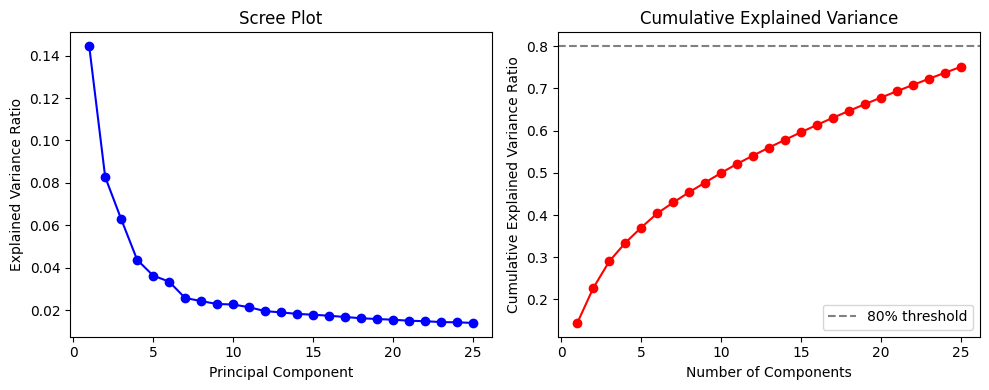

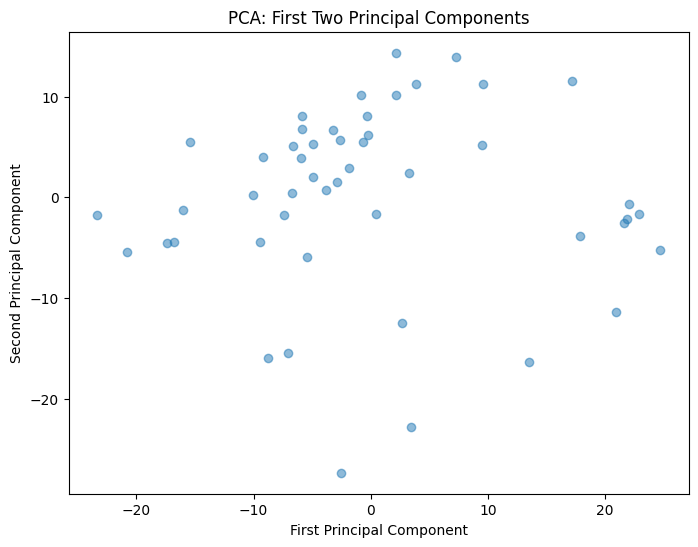

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(range(1, len(explained) + 1), explained, 'bo-')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot')

ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.set_title('Cumulative Explained Variance')
ax2.axhline(y=0.8, color='gray', linestyle='--', label='80% threshold')
ax2.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Principal Components')
plt.show()

### Clustering 

Now let's cluster the result of the PCA. I'll try 2 to 7 clusters and measure the silhouette score. 

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

results = []
labels_by_k = {}
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    y = km.fit_predict(X_pca)
    sil = silhouette_score(X_pca, y)
    sizes = pd.Series(y).value_counts().sort_index().to_dict()
    results.append({"k": k, "silhouette": sil, "sizes": sizes})
    labels_by_k[k] = y

res_df = pd.DataFrame(results)
display(res_df)

best_k = res_df.sort_values(["silhouette"], ascending=False).iloc[0]["k"]
print("Chosen k =", int(best_k))
y_clust = labels_by_k[int(best_k)]

,k,silhouette,sizes
0,2,0.091304,"{0: 30, 1: 19}"
1,3,0.089071,"{0: 22, 1: 16, 2: 11}"
2,4,0.094893,"{0: 18, 1: 10, 2: 11, 3: 10}"
3,5,0.042029,"{0: 10, 1: 9, 2: 14, 3: 12, 4: 4}"
4,6,0.050562,"{0: 12, 1: 7, 2: 11, 3: 10, 4: 4, 5: 5}"
5,7,0.035038,"{0: 8, 1: 6, 2: 11, 3: 4, 4: 4, 5: 7, 6: 9}"
6,8,0.095608,"{0: 8, 1: 9, 2: 2, 3: 5, 4: 2, 5: 7, 6: 10, 7: 6}"
7,9,0.077693,"{0: 8, 1: 8, 2: 2, 3: 4, 4: 2, 5: 5, 6: 10, 7:..."


Chosen k = 8


### Univariate Summaries 

,mean,median,std,gene,cluster
0,-0.143495,-0.425409,1.082742,ENST00000677236.1,0
1,0.148809,0.669451,0.969364,ENST00000677236.1,1
2,1.004103,1.004103,0.058011,ENST00000677236.1,2
3,-0.762784,-1.128075,0.816814,ENST00000677236.1,3
4,-0.282386,-0.282386,1.195984,ENST00000677236.1,4


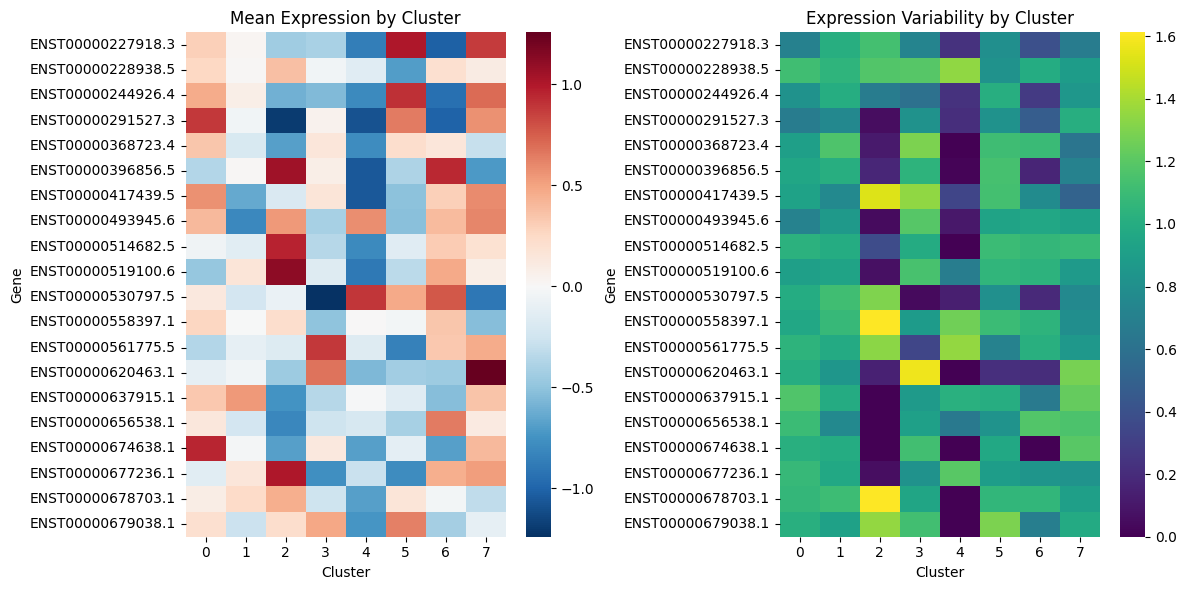

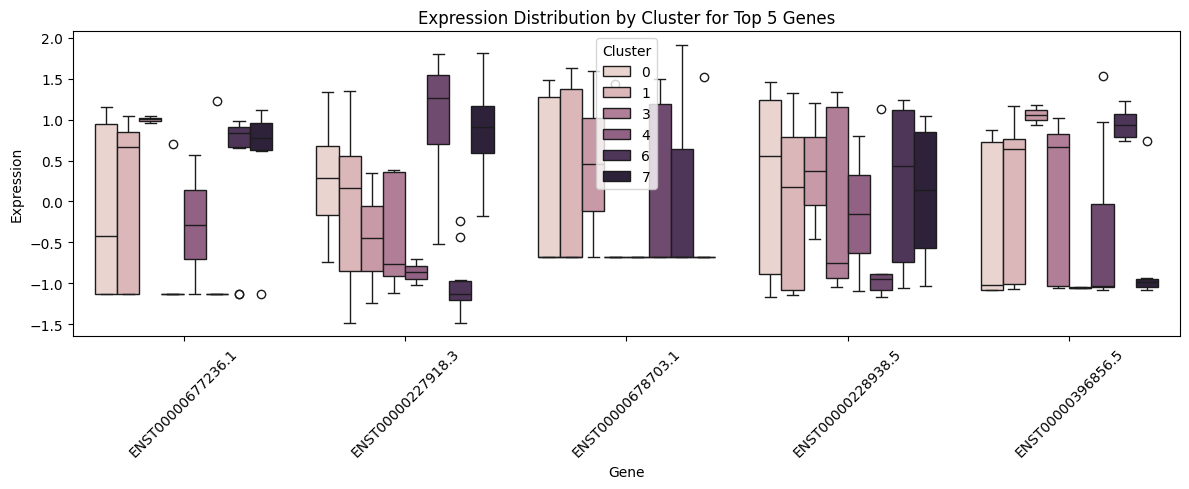

In [40]:
import seaborn as sns

clusters = pd.Series(y_clust, index=df_top_genes.columns, name="cluster")

summary_genes = top_genes[:20]

summaries = []
for g in summary_genes:
    s = df_top_genes.loc[g].groupby(clusters).agg(["mean", "median", "std"])
    s["gene"] = g
    s["cluster"] = s.index
    summaries.append(s.reset_index(drop=True))

summary_df = pd.concat(summaries, ignore_index=True)
display(summary_df.head())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
pivot_mean = summary_df.pivot(index='gene', columns='cluster', values='mean')
sns.heatmap(pivot_mean, cmap='RdBu_r', center=0)
plt.title('Mean Expression by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Gene')

plt.subplot(1, 2, 2)
pivot_std = summary_df.pivot(index='gene', columns='cluster', values='std') 
sns.heatmap(pivot_std, cmap='viridis')
plt.title('Expression Variability by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Gene')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
top5_genes = summary_genes[:5]
plot_data = []
for g in top5_genes:
    gene_data = df_top_genes.loc[g]
    plot_data.append(pd.DataFrame({
        'Expression': gene_data.values,
        'Cluster': clusters,
        'Gene': g
    }))
plot_df = pd.concat(plot_data)

sns.boxplot(data=plot_df, x='Gene', y='Expression', hue='Cluster')
plt.xticks(rotation=45)
plt.title('Expression Distribution by Cluster for Top 5 Genes')
plt.tight_layout()
plt.show()

### Statistical Tests + Multiple Testing Control (FDR)

In [41]:
from scipy.stats import f_oneway, kruskal
from statsmodels.stats.multitest import multipletests

pvals = []
for g in top_genes[:500]:
    groups = [df_top_genes.loc[g, clusters==c].values for c in np.unique(clusters)]
    if len(groups) >= 2:
        try:
            stat, p = f_oneway(*groups)
        except Exception:
            stat, p = kruskal(*groups)
        pvals.append((g, p))

pval_df = pd.DataFrame(pvals, columns=["gene", "pval"]).dropna()
pval_df["qval"] = multipletests(pval_df["pval"], method="fdr_bh")[1]
display(pval_df.sort_values("qval").head(5))

,gene,pval,qval
288,ENST00000374037.8,1.296556e-11,6.482782e-09
153,ENST00000250448.5,4.644537e-11,1.161134e-08
329,ENST00000390629.3,9.730961e-11,1.389286e-08
253,ENST00000410078.2,1.111429e-10,1.389286e-08
36,ENST00000419304.7,1.418965e-10,1.418965e-08


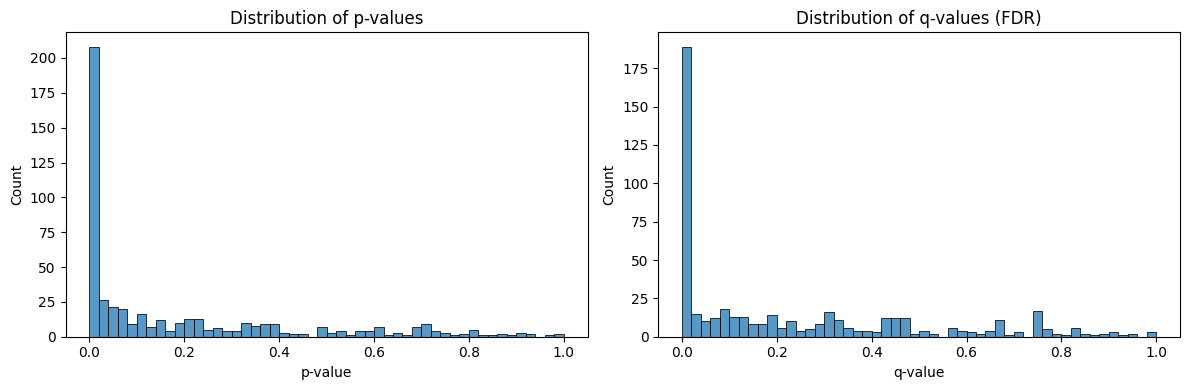

In [42]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=pval_df, x="pval", bins=50)
plt.title("Distribution of p-values")
plt.xlabel("p-value")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(data=pval_df, x="qval", bins=50)
plt.title("Distribution of q-values (FDR)")
plt.xlabel("q-value")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Effect Size Table 

To complement the significance tests, compute and report effect sizes (e.g., Cohen’s *d*) between the two clusters.

In [43]:
def cohens_d(a, b):
    na, nb = len(a), len(b)
    s_p = np.sqrt(((na-1)*a.var(ddof=1) + (nb-1)*b.var(ddof=1)) / (na+nb-2))
    return (a.mean() - b.mean()) / s_p

largest_two = pd.Series(y_clust).value_counts().index[:2]
i, j = largest_two[0], largest_two[1]
eff = []
for g in top_genes[:500]:
    a = df_top_genes.loc[g, clusters==i].values
    b = df_top_genes.loc[g, clusters==j].values
    if len(a)>2 and len(b)>2:
        eff.append((g, cohens_d(a,b)))
eff_df = pd.DataFrame(eff, columns=["gene","cohens_d"]).sort_values("cohens_d", key=abs, ascending=False)
display(eff_df.head(10))

,gene,cohens_d
161,ENST00000439649.7,-4.019115
495,ENST00000599198.5,-3.768132
184,ENST00000338799.9,-3.453366
426,ENST00000351559.10,-2.878653
132,ENST00000593298.5,-2.781543
431,ENST00000206249.8,-2.737254
39,ENST00000310398.7,-2.691559
373,ENST00000443427.5,-2.669812
334,ENST00000524245.5,-2.618249
457,ENST00000178638.8,-2.616724


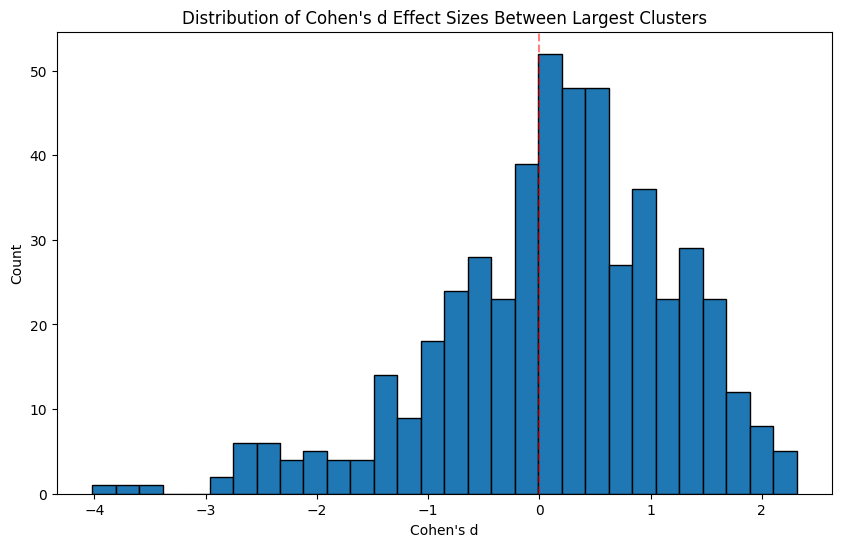

In [44]:
plt.figure(figsize=(10,6))
plt.hist(eff_df["cohens_d"], bins=30, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.title("Distribution of Cohen's d Effect Sizes Between Largest Clusters")
plt.xlabel("Cohen's d")
plt.ylabel("Count")
plt.show()

### Multivariate Explanation (Logistic Regression / Random Forest / Permutation Importance)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)
X = df_top_genes.T.values
y = y_clust
X_reduced = selector.fit_transform(X, y)
selected_genes = df_top_genes.index[selector.get_support()]

logreg = LogisticRegression(max_iter=2000, multi_class="multinomial", penalty="l2", C=0.1)
logreg.fit(X_reduced, y)
coef_df = pd.DataFrame(logreg.coef_, columns=selected_genes)

rf = RandomForestClassifier(n_estimators=300, max_depth=5, min_samples_leaf=5, random_state=42, n_jobs=-1)
rf.fit(X_reduced, y)

perm = permutation_importance(rf, X_reduced, y, n_repeats=30, random_state=42, n_jobs=-1)

imp_df = pd.DataFrame({
    "gene": selected_genes,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)
display(imp_df.tail(5))


/Users/vera.galinova/dev/masters/vis_rnaseq_data/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,gene,importance_mean,importance_std
5,ENST00000390545.3,0.018367,0.018518
2,ENST00000390323.2,0.016327,0.019996
1,ENST00000250448.5,0.008163,0.014527
3,ENST00000410078.2,0.003401,0.022408
6,ENST00000390560.2,-0.001361,0.020363


Permutation-importance bar plot

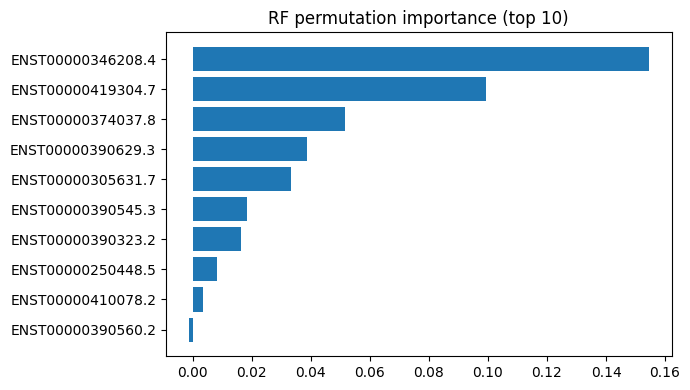

In [49]:
import matplotlib.pyplot as plt

imp_top = imp_df.head(10)
plt.figure(figsize=(7,4))
plt.barh(imp_top["gene"][::-1], imp_top["importance_mean"][::-1])
plt.title("RF permutation importance (top 10)"); plt.tight_layout()

Logistic regression odds-ratio forest plot

### Visualizations: Heatmap, t-SNE, UMAP

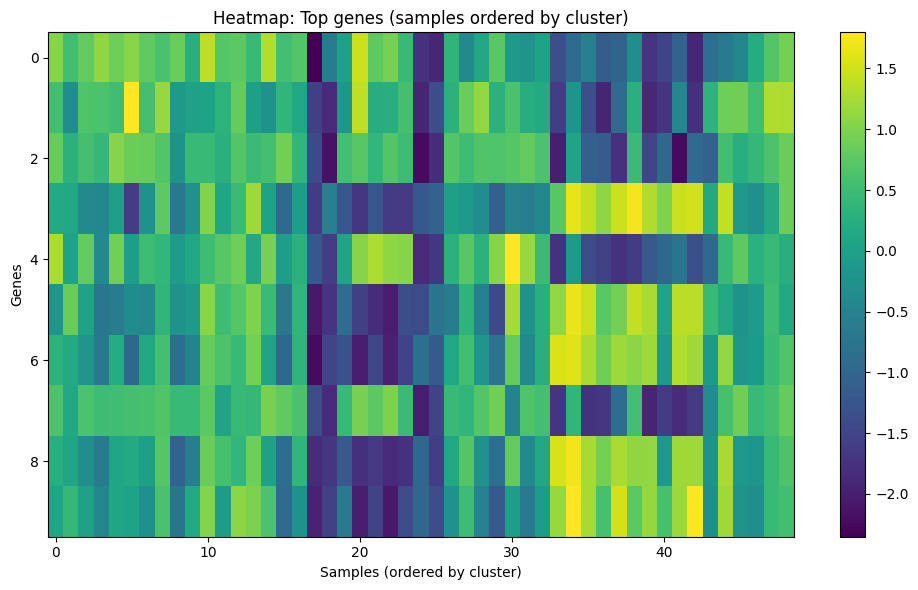

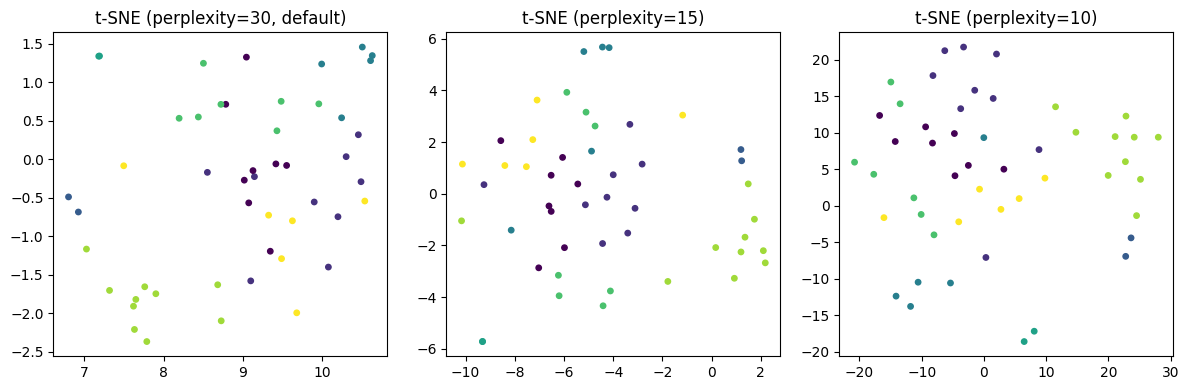

/Users/vera.galinova/dev/masters/vis_rnaseq_data/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/vera.galinova/dev/masters/vis_rnaseq_data/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/vera.galinova/dev/masters/vis_rnaseq_data/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


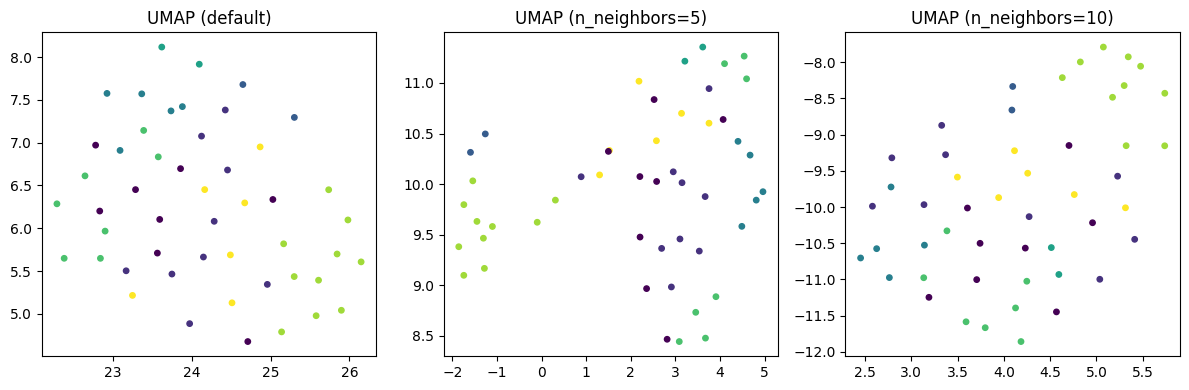

In [50]:
import umap
from sklearn.manifold import TSNE

top50 = imp_df["gene"].head(50).tolist() if "imp_df" in globals() else top_genes[:50]
mat = df_top_genes.loc[top50]

order = np.argsort(y)
mat_ord = mat.iloc[:, order]

plt.figure(figsize=(10, 6))
plt.imshow(mat_ord, aspect='auto')
plt.colorbar()
plt.title("Heatmap: Top genes (samples ordered by cluster)")
plt.xlabel("Samples (ordered by cluster)")
plt.ylabel("Genes")
plt.tight_layout()
plt.show()

# t-SNE with different perplexity values
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

tsne_emb1 = TSNE(n_components=2, random_state=42, init="pca", perplexity=30, learning_rate="auto").fit_transform(X_pca)
ax1.scatter(tsne_emb1[:,0], tsne_emb1[:,1], c=y, s=15)
ax1.set_title("t-SNE (perplexity=30, default)")

tsne_emb2 = TSNE(n_components=2, random_state=42, init="pca", perplexity=15, learning_rate="auto").fit_transform(X_pca)
ax2.scatter(tsne_emb2[:,0], tsne_emb2[:,1], c=y, s=15)
ax2.set_title("t-SNE (perplexity=15)")

tsne_emb3 = TSNE(n_components=2, random_state=42, init="pca", perplexity=10, learning_rate="auto").fit_transform(X_pca)
ax3.scatter(tsne_emb3[:,0], tsne_emb3[:,1], c=y, s=15)
ax3.set_title("t-SNE (perplexity=10)")

plt.tight_layout()
plt.show()

# UMAP with different n_neighbors values
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

umap_emb1 = umap.UMAP(n_components=2, random_state=42).fit_transform(X_pca)  # default n_neighbors=15
ax1.scatter(umap_emb1[:,0], umap_emb1[:,1], c=y, s=15)
ax1.set_title("UMAP (default)")

umap_emb2 = umap.UMAP(n_components=2, random_state=42, n_neighbors=5).fit_transform(X_pca)
ax2.scatter(umap_emb2[:,0], umap_emb2[:,1], c=y, s=15)
ax2.set_title("UMAP (n_neighbors=5)")

umap_emb3 = umap.UMAP(n_components=2, random_state=42, n_neighbors=10).fit_transform(X_pca)
ax3.scatter(umap_emb3[:,0], umap_emb3[:,1], c=y, s=15)
ax3.set_title("UMAP (n_neighbors=10)")

plt.tight_layout()
plt.show()